In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('covid_clinical_trials.csv')  # change name if needed


In [13]:
df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [14]:
df.shape


(5783, 27)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [16]:
status_counts = df['Status'].value_counts()
status_counts


,count
Status,
Recruiting,2805
Completed,1025
Not yet recruiting,1004
"Active, not recruiting",526
Enrolling by invitation,181
Withdrawn,107
Terminated,74
Suspended,27
Available,19


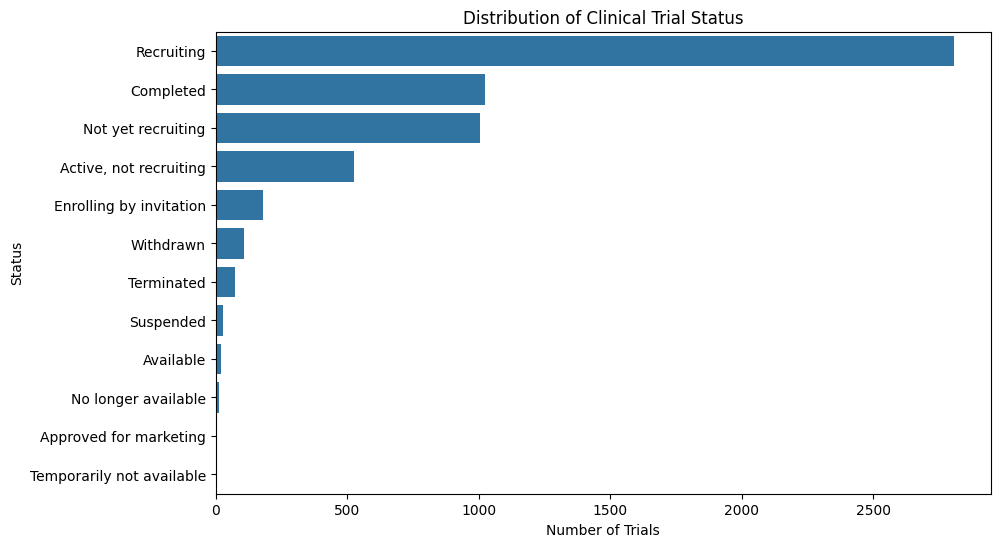

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=status_counts.values,
    y=status_counts.index
)
plt.title('Distribution of Clinical Trial Status')
plt.xlabel('Number of Trials')
plt.ylabel('Status')
plt.show()


In [18]:
# Extract country from Locations column
df['Country'] = df['Locations'].astype(str).apply(lambda x: x.split(',')[-1].strip())

# Top 10 countries
top_countries = df['Country'].value_counts().head(10)
top_countries


,count
Country,
United States,1267
France,647
nan,585
United Kingdom,306
Italy,235
Spain,234
Turkey,219
Canada,202
Egypt,192


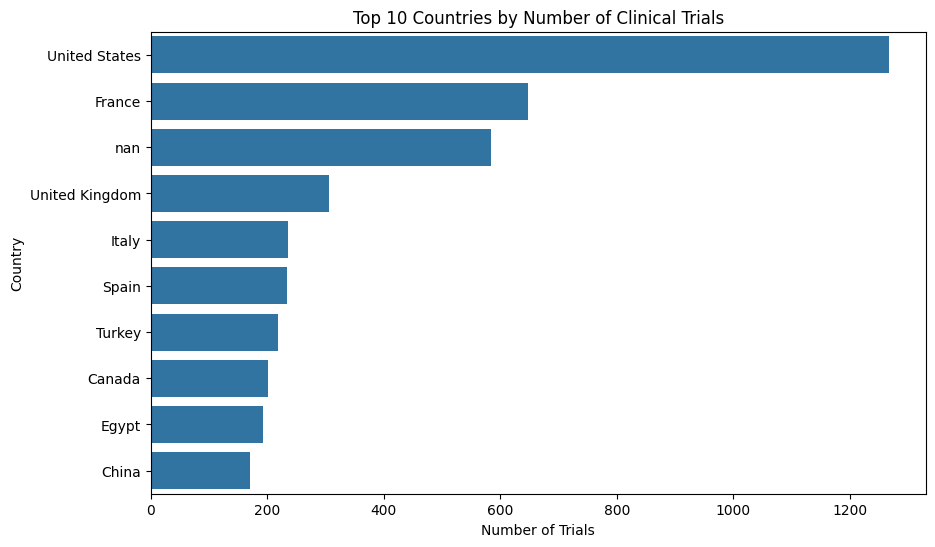

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index
)
plt.title('Top 10 Countries by Number of Clinical Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Country')
plt.show()


In [20]:
phase_counts = df['Phases'].value_counts()
phase_counts


,count
Phases,
Not Applicable,1354
Phase 2,685
Phase 3,450
Phase 1,234
Phase 2|Phase 3,200
Phase 1|Phase 2,192
Phase 4,161
Early Phase 1,46


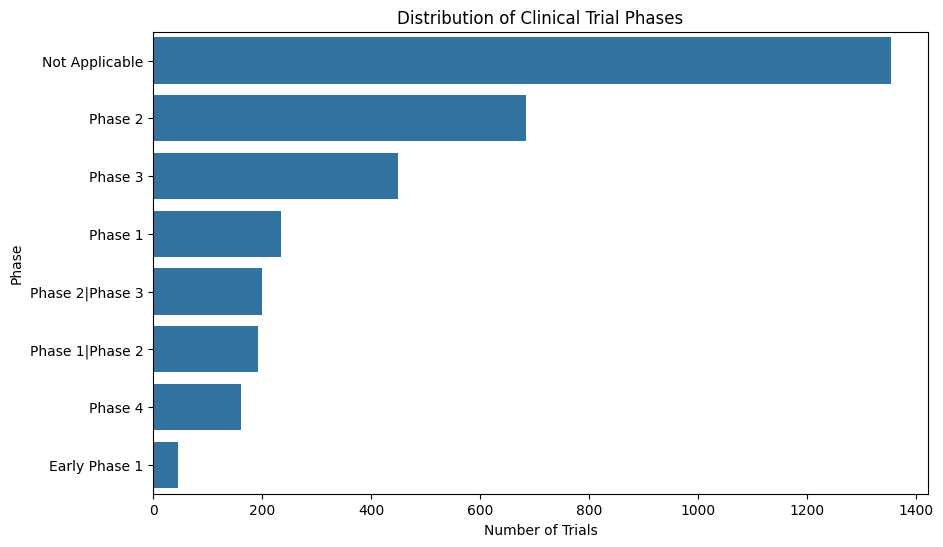

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=phase_counts.values,
    y=phase_counts.index
)
plt.title('Distribution of Clinical Trial Phases')
plt.xlabel('Number of Trials')
plt.ylabel('Phase')
plt.show()


In [22]:
gender_counts = df['Gender'].value_counts()
gender_counts


,count
Gender,
All,5567
Female,162
Male,44


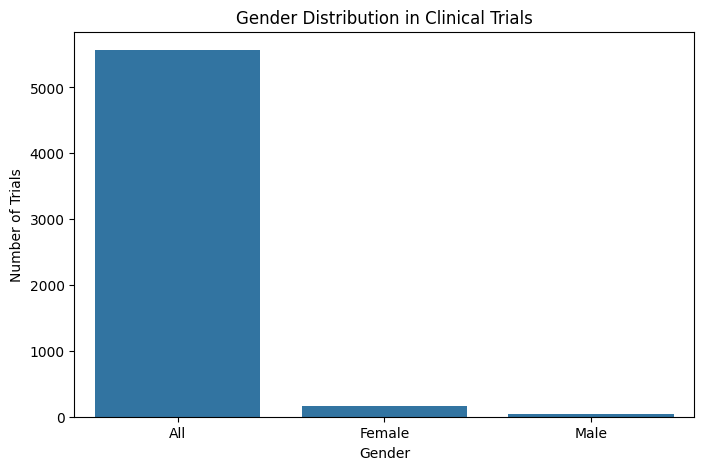

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values
)
plt.title('Gender Distribution in Clinical Trials')
plt.xlabel('Gender')
plt.ylabel('Number of Trials')
plt.show()


In [24]:
# Convert Start Date to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Group by month
trials_over_time = df['Start Date'].dt.to_period('M').value_counts().sort_index()
trials_over_time


,count
Start Date,
1998-01,1
2010-03,1
2011-02,1
2011-03,1
2012-01,1
...,...
2021-08,2
2021-09,8
2021-10,3


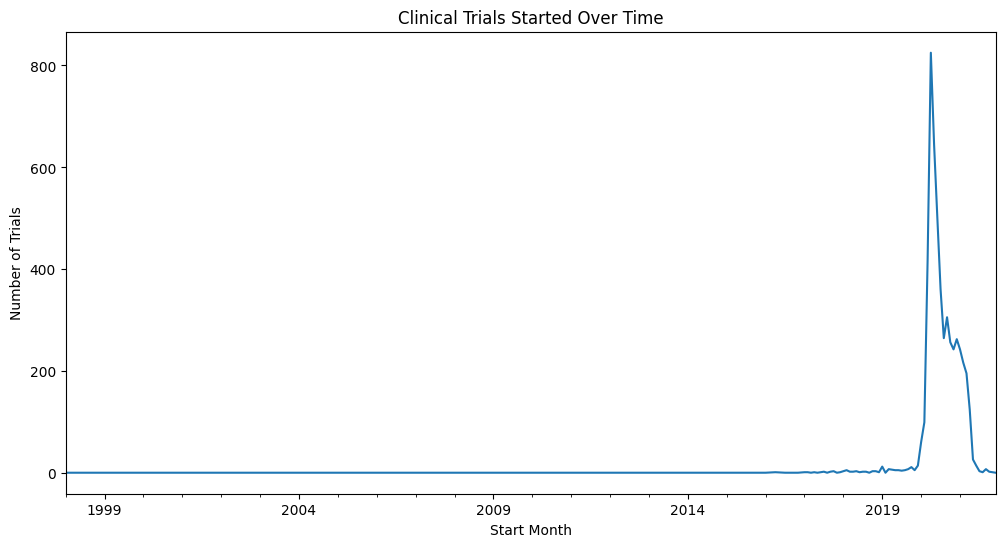

In [25]:
plt.figure(figsize=(12,6))
trials_over_time.plot(kind='line')
plt.title('Clinical Trials Started Over Time')
plt.xlabel('Start Month')
plt.ylabel('Number of Trials')
plt.show()
